## Here we are going to do some data analysis about species at various national parks.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset via link
species = pd.read_csv('https://raw.githubusercontent.com/SLaguerta/biodiversity-capstone/master/species_info.csv')

In [3]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
# counting no.of NULL values in dataset
species.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [6]:
species.shape

(5824, 4)

In [8]:
# no. of unique species
unique_scientific_names = np.unique(species['scientific_name'])
len(unique_scientific_names)

5541

In [9]:
# name of unique species
unique_category = np.unique(species.iloc[:, 0].values)
unique_category

array(['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant',
       'Reptile', 'Vascular Plant'], dtype=object)

In [10]:
len(unique_category)

7

In [11]:
# total there are 7 unique categories

> How many different species are there in dataframe(species)?

In [10]:
species['scientific_name'].nunique()

5541

> what are Different values in Species?

In [12]:
species['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

> What are different values of Conservation Status?

In [12]:
species['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

### Since many values in conservation status are NaN that means that species is not in any kind of conservation status
### we will finding how many species are there in each category by using group function

In [13]:
species.groupby('conservation_status')['scientific_name'].nunique()

conservation_status
Endangered             15
In Recovery             4
Species of Concern    151
Threatened             10
Name: scientific_name, dtype: int64

In [14]:
# in tabular manner
species.groupby('conservation_status')['scientific_name'].nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10


> As we saw before, there are far more than 200 species in the species table. Clearly, only a small number of them are categorized as needing some sort of protection. The rest have conservation_status equal to None. Because groupby does not include None, we will need to fill in the null values. We can do this using .fillna. We pass in however we want to fill in our None values as an argument.

In [15]:
# we will replacing NaN with " No intervention"
species.fillna('No Intervention', inplace=True)

In [17]:
species.groupby('conservation_status')['scientific_name'].nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,No Intervention,5363
3,Species of Concern,151
4,Threatened,10


In [18]:
# sorting the values according the scientific names
protection_counts = species.groupby('conservation_status')['scientific_name'].nunique().reset_index()\
                           .sort_values(by = 'scientific_name')

In [19]:
protection_counts

,conservation_status,scientific_name
1,In Recovery,4
4,Threatened,10
0,Endangered,15
3,Species of Concern,151
2,No Intervention,5363


> Plotting the results to visualise

[Text(0,0,'In Recovery'),
 Text(0,0,'Threatened'),
 Text(0,0,'Endangered'),
 Text(0,0,'Species of Concern'),
 Text(0,0,'No Intervention')]

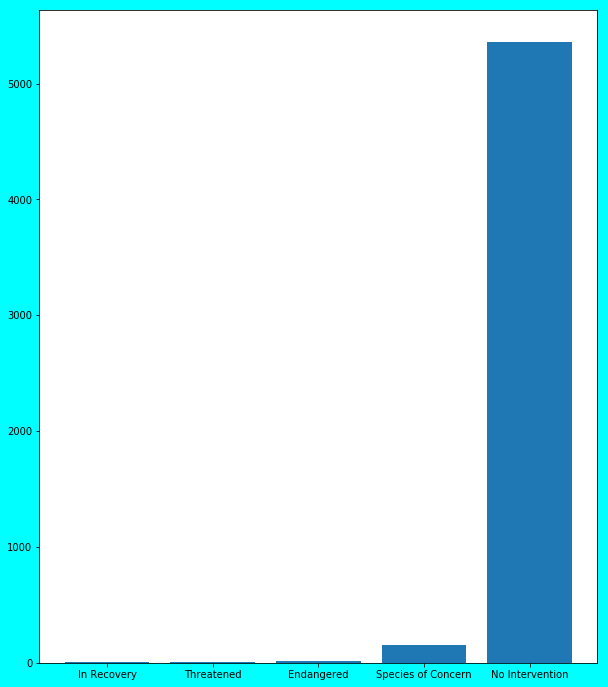

In [20]:
plt.figure(figsize=(10, 12), facecolor='cyan')
ax = plt.subplot()
plt.bar(range(len(protection_counts['conservation_status'])),
         protection_counts['scientific_name'])
ax.set_xticks(range(len(protection_counts['conservation_status'])))
ax.set_xticklabels(protection_counts['conservation_status'])

> Let's create a new column in species called is_protected, which is True if conservation_status is not equal to No Intervention, and False otherwise

## we will be Adding False in place where any animal does not need any kind of protection else we will be adding True

In [23]:
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,No Intervention


In [24]:
species['is_protected'] = species['conservation_status']

In [25]:
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,No Intervention


In [26]:
species.loc[species['is_protected'] == 'No Intervention', 'is_protected'] = False

In [27]:
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [28]:
species['is_protected'].unique()

array([False, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [31]:
category_counts = species.groupby(['category', 'is_protected'])['scientific_name'].nunique().reset_index()

> Detailed view of different category, how many are there in what type of category
for ex:
>> 4 amphibian are in species of concern and 1 amphibian is in endagered state while on the other hand other amphibian species does not need any kind of protection

In [32]:
category_counts

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,Endangered,1
2,Amphibian,Species of Concern,4
3,Amphibian,Threatened,2
4,Bird,False,413
5,Bird,Endangered,4
6,Bird,In Recovery,3
7,Bird,Species of Concern,68
8,Fish,False,115
9,Fish,Endangered,3


### More detailed view

In [35]:
category_pivot = category_counts.pivot(columns= 'is_protected',
                                       index = 'category',
                                       values='scientific_name')\
                                .reset_index()

In [36]:
category_pivot

is_protected,category,False,Endangered,In Recovery,Species of Concern,Threatened
0,Amphibian,72.0,1.0,NaN,4.0,2.0
1,Bird,413.0,4.0,3.0,68.0,NaN
2,Fish,115.0,3.0,NaN,4.0,4.0
3,Mammal,146.0,6.0,1.0,22.0,2.0
4,Nonvascular Plant,328.0,NaN,NaN,5.0,NaN
5,Reptile,73.0,NaN,NaN,5.0,NaN
6,Vascular Plant,4216.0,1.0,NaN,43.0,2.0


In [37]:
species.loc[species['is_protected'] != False, 'is_protected'] = True

In [38]:
species['is_protected'].unique()

array([False, True], dtype=object)

In [39]:
category_counts = species.groupby(['category', 'is_protected'])['scientific_name'].nunique().reset_index()

In [40]:
category_counts

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115
5,Fish,True,11
6,Mammal,False,146
7,Mammal,True,30
8,Nonvascular Plant,False,328
9,Nonvascular Plant,True,5


In [41]:
category_counts.head()

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115


> It's going to be easier to view this data if we pivot it. Using pivot, rearange category_counts so that:

>>columns is conservation_status
index is category
values is scientific_name

In [42]:
category_pivot = category_counts.pivot(columns= 'is_protected',
                                       index = 'category',
                                       values='scientific_name').reset_index()

In [43]:
category_pivot

is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


## Using Pivot table 

In [46]:
category_pivot.columns = ['category', 'not_protected', 'protected']

In [47]:
category_pivot

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


### Let's create a new column of category_pivot called percent_protected, which is equal to protected (the number of species that are protected) divided by protected plus not_protected (the total number of species).

In [50]:
category_pivot['percent_protected'] = category_pivot['protected']/(category_pivot['protected'] + category_pivot['not_protected'])

In [51]:
category_pivot

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


>It looks like species in category Mammal are more likely to be endangered than species in Bird.

A small chi2 value means that there is little relationship between the categorical variables. A large chi2 value means that there is a definite correlation between the two variables. As there is some pretty strong evidence that sexual orientation is linked to a higher risk of contracting AIDS, it’s no surprise that the chi2 value is rather high:

A chi2 test can be conducted on contingency tables to test whether or not a relationship exists between variables. These effects are defined as relationships between rows and columns. The chi2 test:

Contingency tables (also called crosstabs or two-way tables) are used in statistics to summarize the relationship between several categorical variables. A contingency table is a special type of frequency distribution table, where two variables are shown simultaneously.

In [52]:
contingency = [[30, 146],
               [75, 413]]

In [53]:
# In order to perform our chi square test, we'll need to import the correct function from scipy.
# Past the following code and run it:

In [54]:
from scipy.stats import chi2_contingency
chi2_contingency(contingency)

(0.1617014831654557, 0.6875948096661336, 1, array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

In [55]:
# Let's test another. Is the difference between Reptile and Mammal significant?

In [56]:
contingency_mammal_reptile = [[30, 146],
                              [5, 73]]
chi2_contingency(contingency_mammal_reptile)

(4.289183096203645, 0.03835559022969898, 1, array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

# ---------------------------------------------------------------------------------------------

## Conservationists have been recording sightings of different species at several national parks for the past 7 days. Observations are recorded in a file called observations.csv.

In [58]:
observations = pd.read_csv('https://raw.githubusercontent.com/SLaguerta/biodiversity-capstone/master/observations.csv')

In [59]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [60]:
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


### Some scientists are studying the number of sheep sightings at different national parks. There are several different scientific names for different types of sheep. We'd like to know which rows of species are referring to sheep. Notice that the following code will tell us whether or not a word 
occurs in a string:

In [61]:
species['is_sheep'] = species['common_names'].apply(lambda x: 'Sheep' in x)

In [63]:
species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


#### Finding out the rows which have sheeps in them

In [64]:
species[species['is_sheep'] == True]

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


### Sheep and Mammal

In [65]:
sheep_species = species[(species['is_sheep'] == True) & (species['category'] == 'Mammal')]
sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


#### Now merge sheep_species with observations to get a DataFrame with observations of sheep. Save this DataFrame as sheep_observations.

In [66]:
sheep_observations = observations.merge(sheep_species)

In [67]:
sheep_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
5,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
6,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
7,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
8,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
9,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True


In [68]:
# How many total sheep observations (across all three species) were made at each national park

In [69]:
obs_by_park = sheep_observations.groupby('park_name')['common_names'].count()

In [70]:
obs_by_park

park_name
Bryce National Park                    3
Great Smoky Mountains National Park    3
Yellowstone National Park              3
Yosemite National Park                 3
Name: common_names, dtype: int64

In [71]:
obs_by_park = sheep_observations.groupby('park_name')['observations'].sum()

In [72]:
obs_by_park

park_name
Bryce National Park                    250
Great Smoky Mountains National Park    149
Yellowstone National Park              507
Yosemite National Park                 282
Name: observations, dtype: int64

In [73]:
obs_by_park = sheep_observations.groupby('park_name')['observations'].sum().reset_index()

In [74]:
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


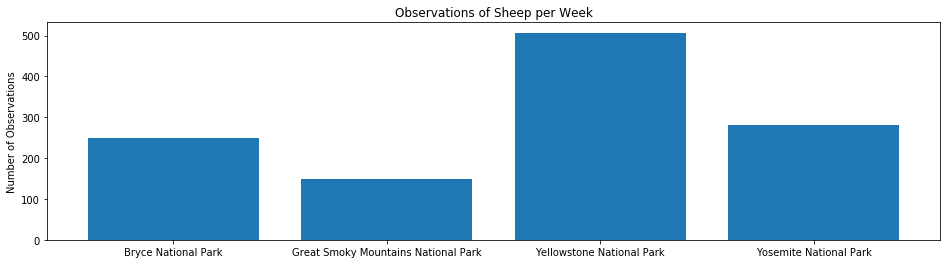

In [75]:
plt.figure(figsize=(16,4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park['park_name'])), obs_by_park['observations'])
ax.set_xticks(range(len(obs_by_park['park_name'])))
ax.set_xticklabels(obs_by_park['park_name'])
plt.ylabel('Number of Observations')
plt.title('Observations of Sheep per Week')
plt.savefig('sheep_obs.png')
plt.show()

> ## ::-> Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease. Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park. The scientists want to test whether or not this program is working. They want to be able to detect reductions of at least 5 percentage point. For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

> ### ::-> Use the sample size calculator at Optimizely to calculate the number of sheep that they would need to observe from each park. Use the default level of significance (90%).

>> ### ::-> Remember that "Minimum Detectable Effect" is a percent of the baseline.

# Some Statistics Need to conclude the results

## Topics you need read to understand the code

> ### .minimum detectable effect
> ### .Chi2
> ### .Contingent Table
> ### .Baseline and statistical Significance

In [76]:
#sample size calc inputs
minimum_detectable_effect = 5/15.0 * 100
baseline = 15
statistical_significance = 90

minimum_detectable_effect

33.33333333333333

In [77]:
sample_size_per_variation = 510
sample_size_per_variation

510

In [78]:
weeks_bryce = 510.0 / 250
weeks_yellowstone = 510.0 / 507

print(weeks_bryce)
print(weeks_yellowstone)

2.04
1.0059171597633136


# I would need about 2 weeks at Bryce and 1 week at Yellowstone to observe enough sheep.